In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")

In [5]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

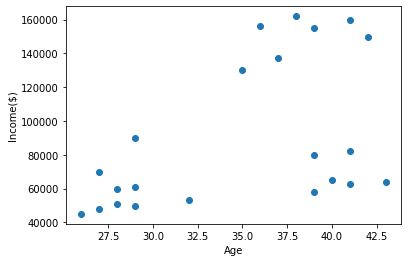

In [11]:
plt.scatter(df.Age,df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [12]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])

In [16]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [17]:
df["cluster"] = y_predicted

In [18]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [19]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [21]:
df.cluster==0

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20     True
21    False
Name: cluster, dtype: bool

In [38]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

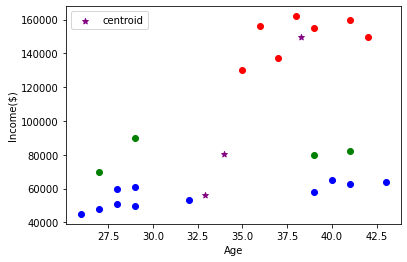

In [43]:
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [47]:
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

In [50]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [52]:
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

In [54]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


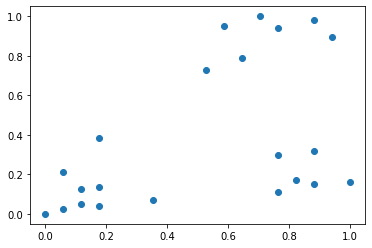

In [56]:
plt.scatter(df.Age,df["Income($)"])

In [58]:
km= KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])

In [59]:
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [61]:
df["cluster"]= y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [62]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

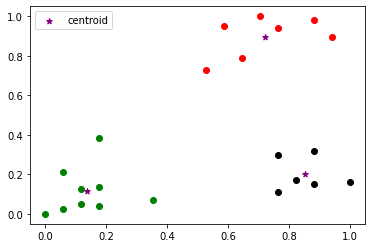

In [69]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [70]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

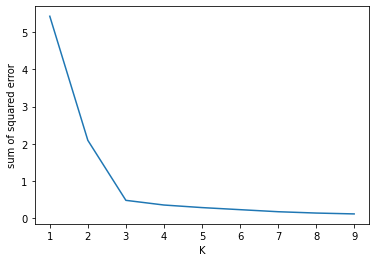

In [71]:
plt.xlabel("K")
plt.ylabel("sum of squared error")
plt.plot(k_rng,sse)